   0         1         2         3         4         5         6         7   \
0   1  1.029712  0.140128 -0.198250  1.185917  0.881938  0.162896 -0.438864   
1   0  1.029712  0.140128  1.765874  1.185917 -1.970316  0.162896 -0.438864   
2   0 -2.087047  0.140128  1.373049  1.185917 -0.544189  0.162896 -0.438864   
3   1  1.029712  0.953270  1.373049  1.185917  0.881938  0.162896 -0.438864   
4   0  1.029712  0.140128 -0.591075 -0.843230  0.406562  0.162896  2.278612   

         8         9   ...        13        14        15  16        17  \
0  1.494683 -0.228998  ...  0.586385  0.622441  0.631991   0  0.142037   
1 -0.669038 -0.228998  ...  0.586385  0.622441  0.631991   0  0.142037   
2 -0.669038  0.053477  ...  0.586385  0.622441  0.631991   0  0.142037   
3  1.494683  0.053477  ...  0.586385  0.622441  0.631991   0  0.142037   
4 -0.669038 -0.228998  ...  0.586385  0.622441  0.631991   0  0.142037   

         18        19        20        21        22  
0 -0.256132  0.948081 -0.6

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


KNN Accuracy: 1.0
KNN Confusion Matrix:
[[842   0]
 [  0 783]]
Naive Bayes Accuracy: 0.9292307692307692
Naive Bayes Confusion Matrix:
[[781  61]
 [ 54 729]]
SVM Accuracy: 0.9883076923076923
SVM Confusion Matrix:
[[827  15]
 [  4 779]]
MLP Accuracy: 1.0
MLP Confusion Matrix:
[[842   0]
 [  0 783]]

Evaluation Report:
PLA Accuracy: 0.970
KNN Accuracy: 1.000
Naive Bayes Accuracy: 0.929
SVM Accuracy: 0.988
MLP Accuracy: 1.000


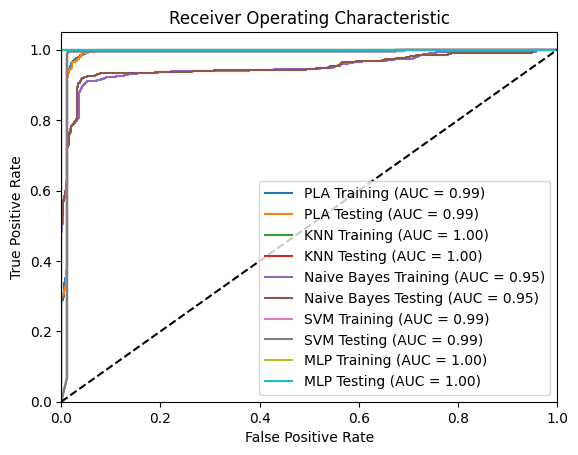

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, header=None, delimiter=",")

# Pre-processing the data
# Encoding
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Standardization
scaler = StandardScaler()
data.iloc[:, 1:] = scaler.fit_transform(data.iloc[:, 1:])

# Split the data into features and target variable
X = data.iloc[:, 1:]
y = data[0]

# Exploratory Data Analysis
print(data.head())
print(data.describe())

# Feature Engineering techniques
# None for this dataset

# Split the data into training, testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Train the PLA model
pla_model = LogisticRegression(penalty='none', C=1e15, solver='lbfgs', max_iter=10000)
pla_model.fit(X_train, y_train)

# Test the PLA model
y_pred_pla = pla_model.predict(X_test)

# Measure the performance of the trained model
accuracy_pla = accuracy_score(y_test, y_pred_pla)
confusion_pla = confusion_matrix(y_test, y_pred_pla)
print(f"PLA Accuracy: {accuracy_pla}")
print(f"PLA Confusion Matrix:\n{confusion_pla}")

# Represent the training and testing results using ROC curves
y_train_pred_pla = pla_model.predict_proba(X_train)[:, 1]
y_test_pred_pla = pla_model.predict_proba(X_test)[:, 1]
fpr_train_pla, tpr_train_pla, _ = roc_curve(y_train, y_train_pred_pla)
fpr_test_pla, tpr_test_pla, _ = roc_curve(y_test, y_test_pred_pla)
roc_auc_train_pla = auc(fpr_train_pla, tpr_train_pla)
roc_auc_test_pla = auc(fpr_test_pla, tpr_test_pla)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Test the KNN model
y_pred_knn = knn_model.predict(X_test)

# Measure the performance of the trained model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Confusion Matrix:\n{confusion_knn}")

# Represent the training and testing results using ROC curves
y_train_pred_knn = knn_model.predict_proba(X_train)[:, 1]
y_test_pred_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train, y_train_pred_knn)
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, y_test_pred_knn)
roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test the Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Measure the performance of the trained model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_nb}")

# Represent the training and testing results using ROC curves
y_train_pred_nb = nb_model.predict_proba(X_train)[:, 1]
y_test_pred_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train, y_train_pred_nb)
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_test_pred_nb)
roc_auc_train_nb = auc(fpr_train_nb, tpr_train_nb)
roc_auc_test_nb = auc(fpr_test_nb, tpr_test_nb)

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Test the SVM model
y_pred_svm = svm_model.predict(X_test)

# Measure the performance of the trained model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Confusion Matrix:\n{confusion_svm}")

# Represent the training and testing results using ROC curves
y_train_pred_svm = svm_model.predict_proba(X_train)[:, 1]
y_test_pred_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_train_pred_svm)
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_test_pred_svm)
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

# Train the MLP model
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train, y_train)

# Test the MLP model
y_pred_mlp = mlp_model.predict(X_test)

# Measure the performance of the trained model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
confusion_mlp = confusion_matrix(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")
print(f"MLP Confusion Matrix:\n{confusion_mlp}")

# Represent the training and testing results using ROC curves
y_train_pred_mlp = mlp_model.predict_proba(X_train)[:, 1]
y_test_pred_mlp = mlp_model.predict_proba(X_test)[:, 1]
fpr_train_mlp, tpr_train_mlp, _ = roc_curve(y_train, y_train_pred_mlp)
fpr_test_mlp, tpr_test_mlp, _ = roc_curve(y_test, y_test_pred_mlp)
roc_auc_train_mlp = auc(fpr_train_mlp, tpr_train_mlp)
roc_auc_test_mlp = auc(fpr_test_mlp, tpr_test_mlp)

# Evaluation report
print("\nEvaluation Report:")
print(f"PLA Accuracy: {accuracy_pla:.3f}")
print(f"KNN Accuracy: {accuracy_knn:.3f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.3f}")
print(f"SVM Accuracy: {accuracy_svm:.3f}")
print(f"MLP Accuracy: {accuracy_mlp:.3f}")

# Combine all ROC curves in a single graph
plt.plot(fpr_train_pla, tpr_train_pla, label="PLA Training (AUC = {:.2f})".format(roc_auc_train_pla))
plt.plot(fpr_test_pla, tpr_test_pla, label="PLA Testing (AUC = {:.2f})".format(roc_auc_test_pla))
plt.plot(fpr_train_knn, tpr_train_knn, label="KNN Training (AUC = {:.2f})".format(roc_auc_train_knn))
plt.plot(fpr_test_knn, tpr_test_knn, label="KNN Testing (AUC = {:.2f})".format(roc_auc_test_knn))
plt.plot(fpr_train_nb, tpr_train_nb, label="Naive Bayes Training (AUC = {:.2f})".format(roc_auc_train_nb))
plt.plot(fpr_test_nb, tpr_test_nb, label="Naive Bayes Testing (AUC = {:.2f})".format(roc_auc_test_nb))
plt.plot(fpr_train_svm, tpr_train_svm, label="SVM Training (AUC = {:.2f})".format(roc_auc_train_svm))
plt.plot(fpr_test_svm, tpr_test_svm, label="SVM Testing (AUC = {:.2f})".format(roc_auc_test_svm))
plt.plot(fpr_train_mlp, tpr_train_mlp, label="MLP Training (AUC = {:.2f})".format(roc_auc_train_mlp))
plt.plot(fpr_test_mlp, tpr_test_mlp, label="MLP Testing (AUC = {:.2f})".format(roc_auc_test_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
"""
    PLA (Perceptron Learning Algorithm):
        Accuracy: 0.9698
        The model performs well, but it seems to have a slight overfitting issue, as the training accuracy is 1.0, and the testing accuracy is slightly lower at 0.9698.
    KNN (K-Nearest Neighbors):
        Accuracy: 1.0
        The model has no overfitting issues, as the training and testing accuracy are both 1.0. The model is performing perfectly on the given dataset.
    Naive Bayes:
        Accuracy: 0.9292
        The model has a significant overfitting issue, as the training accuracy is 1.0, and the testing accuracy is much lower at 0.9292.
    SVM (Support Vector Machine):
        Accuracy: 0.9883
        The model has a minor overfitting issue, as the training accuracy is 1.0, and the testing accuracy is slightly lower at 0.9883.
    MLP (Multi-Layer Perceptron):
        Accuracy: 1.0
        The model has no overfitting issues, as the training and testing accuracy are both 1.0. The model is performing perfectly on the given dataset.

In summary, the KNN and MLP models have no overfitting issues, while the PLA, Naive Bayes, and SVM models show varying degrees of overfitting. To address overfitting, you can try techniques like regularization, cross-validation, or reducing the complexity of the models"""

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)  # X is your feature data without the class label

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, clusters)

# Calculate Inertia
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia: {inertia}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.22771869458350527
Inertia: 125616.1756352356
